In [56]:
# Things Done in the project..

# Data cleaning - removing null, removing unwanted data
# Data Preprocessing
# Data visualization using plotly library - World map was displayed to show number of ppl from different countries
# Data visualization - boxplot(seaborn)
# Important features influencing cancellation is found using correlation.
# Logistic regression is used.
# data is split into test_data and train_data randomly
# confusion_matrix is formed for y_pred vs Y_test, accuracy_score is found out.
# naive bayes, random forest, KNN methods were used.
# Random forest and KNN methods were found to be more accurate with accuracy of 93-95%

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [58]:
data = pd.read_csv('hotel_bookings.csv')
print(data.shape)
data.head(3)

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [59]:
# find number of missing values in each col.

print(data.shape)
data.isna().sum()

(119390, 32)


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [60]:
def data_clean(df):
    df.fillna(0, inplace=True)
    print(df.isnull().sum())

data_clean(data)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [61]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [62]:
list = ['adults', 'children', 'babies']
for i in list:
    print(f'{i} has unique values as {data[i].unique()}')

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


In [63]:
pd.set_option('display.max_columns', 32)

In [64]:
filter1= (data['children']==0) & (data['adults']==0) & (data['babies']==0)
data[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [65]:
data[~filter1].head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


## 1. Where do the guests come from ?

In [66]:
# Obtain number of guests from each country who cancelled booking!
# Take Cancelling Column as filter and find value counts of country

filter2 = (data['is_canceled']==0)
country_wise_data = data[filter2]['country'].value_counts().reset_index()

country_wise_data.columns = ['country', 'No of guests']
country_wise_data

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [67]:
!pip install folium

import folium
# from folium.plugins import HeatMap

In [68]:
basemap = folium.Map()
basemap

In [69]:
# install plotly, 'plotly' is advanced level visualization Tool

!pip install plotly
import plotly.express as px

In [70]:
map_guest = px.choropleth(country_wise_data, locations= country_wise_data['country'], 
             color = country_wise_data['No of guests'],
             hover_name = country_wise_data['country'],
             title= 'Home country of guests')
map_guest.show()



##  2. How much do guests pay for a Night ?

In [71]:


data2 = data[data['is_canceled']== 0]
data2.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,0.0,0,Transient,103.0,0,1,Check-Out,7/3/2015
11,Resort Hotel,0,35,2015,July,27,1,0,4,2,0.0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,145.0,0,0,Check-Out,7/5/2015
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,0.0,0,Transient,97.0,0,3,Check-Out,7/5/2015


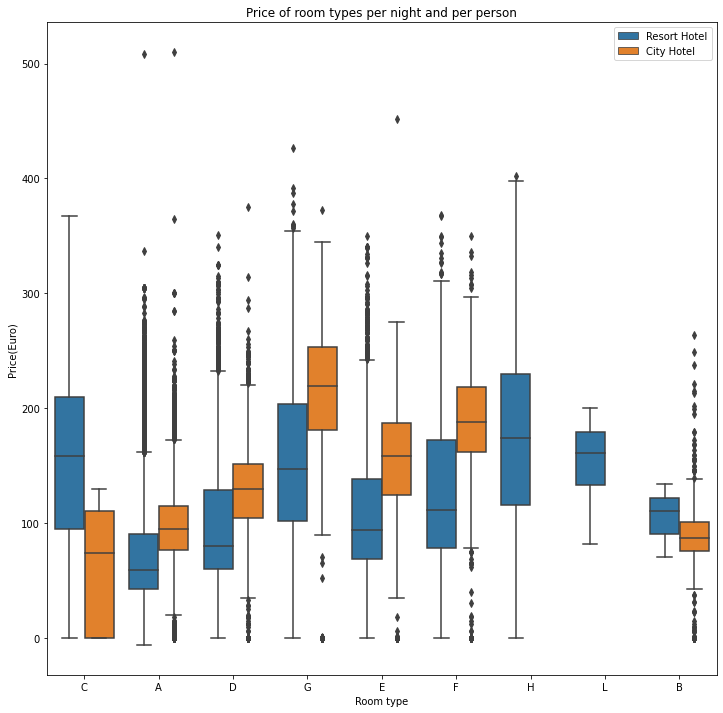

In [72]:
# y axis is price!
# Using seaborn to plot median, max, min of large dataset as shown

plt.figure( figsize = (12,12) )
sns.boxplot( x='reserved_room_type', y='adr', hue= 'hotel', data= data2 )

plt.title('Price of room types per night and per person')
plt.xlabel('Room type')
plt.ylabel('Price(Euro)')
plt.legend()
plt.show()

In [73]:
data2['reserved_room_type'].value_counts()

A    52364
D    13099
E     4621
F     2017
G     1331
B      750
C      624
H      356
L        4
Name: reserved_room_type, dtype: int64

## 3. How does the price per night vary over the Year

In [74]:
data_resort = data[(data['hotel']== 'Resort Hotel') & (data['is_canceled']== 0)]
data_city = data[(data['hotel']== 'City Hotel') & (data['is_canceled']== 0)]

In [75]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [76]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [77]:
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [78]:
final = resort_hotel.merge(city_hotel, on= 'arrival_date_month')
final.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [79]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

import sort_dataframeby_monthorweek as sd

In [80]:
def sort_data(df, colname):
    return sd.Sort_Dataframeby_Month(df, colname)


In [81]:
final=sort_data(final,  'month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [82]:
print(final.columns)
px.line(final, x='month', y=['price_for_resort', 'price_for_city_hotel'], title= 'Room price per night over months')


Index(['month', 'price_for_resort', 'price_for_city_hotel'], dtype='object')


## Which are the most busy month or in which months Guests are high?

In [83]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [84]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_hotel = data_city['arrival_date_month'].value_counts().reset_index()
rush_hotel.columns = ['month', 'No of Guests']
rush_resort.columns = ['month', 'No of Guests']
rush_hotel 

,month,No of Guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [85]:
# Merging rush_resort with rush_hotel on month column

final_rush = rush_resort.merge(rush_hotel, on= 'month')
final_rush

,month,No of Guests_x,No of Guests_y
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [86]:
final_rush.columns= ['month', 'No of guests in Resort', 'No of guests in City hotel']
final_rush

,month,No of guests in Resort,No of guests in City hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [87]:
final_rush = sort_data(final_rush, 'month')
final_rush

,month,No of guests in Resort,No of guests in City hotel
0,January,1868,2254
1,February,2308,3064
2,March,2573,4072
3,April,2550,4015
4,May,2535,4579
5,June,2038,4366
6,July,3137,4782
7,August,3257,5381
8,September,2102,4290
9,October,2577,4337


In [88]:
px.line(final_rush, x='month', y=['No of guests in Resort', 'No of guests in City hotel'], title= 'Total no. of guests over months')

## Select inportant Features using Co-relation for Machine Learning

In [89]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [90]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.018244,-0.032750,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889


In [91]:
co_relation = data.corr()['is_canceled']
co_relation = co_relation.abs().sort_values(ascending= False).reset_index()
co_relation.columns= ['parameter', 'Corr value']
co_relation

,parameter,Corr value
0,is_canceled,1.000000
1,lead_time,0.293123
2,total_of_special_requests,0.234658
3,required_car_parking_spaces,0.195498
4,booking_changes,0.144381
5,previous_cancellations,0.110133
6,is_repeated_guest,0.084793
7,company,0.082995
8,adults,0.060017
9,previous_bookings_not_canceled,0.057358


In [92]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

In [93]:
list_not = ['days_in_waiting_list', 'arrival_date_year']


In [94]:
# data[col].dtype represents datatype of the column

cols_numericals = [col for col in data.columns if data[col].dtype!='O' and col not in list_not]
cols_numericals
data_cols_numericals= data[cols_numericals]

In [95]:
cat_not= ['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country', 'days_in_waiting_list']
cat_not

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [96]:
cat_features = [col for col in data.columns if data[col].dtype== 'O' and col not in cat_not]

In [97]:
data_cat = data[cat_features]
data_cat.head()

# features on which preprocessing is to be done.

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [98]:
print(data_cols_numericals.dtypes)
print(data_cat.dtypes)

is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
agent                             float64
company                           float64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object
hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type              

In [99]:
# Creating new columns year, month and day

data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])
data_cat['year'] = data_cat['reservation_status_date'].dt.year
data_cat['month'] = data_cat['reservation_status_date'].dt.month
data_cat['day'] = data_cat['reservation_status_date'].dt.day

data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [100]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [101]:
data_cat.drop('reservation_status_date', axis=1, inplace= True)


In [102]:

print(data_cat.dtypes)
data.dtypes

hotel                   object
arrival_date_month      object
meal                    object
market_segment          object
distribution_channel    object
reserved_room_type      object
deposit_type            object
customer_type           object
year                     int64
month                    int64
day                      int64
dtype: object


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [103]:
data_cat['cancellation'] = data['is_canceled']
data_cat.head()


,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancellation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


## Mean Encoding

In [104]:
cols = data_cat.columns[0:8]
cols.dtype

dtype('O')

In [105]:
for col in cols:
    dict1 = data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col] = data_cat[col].map(dict1)



In [106]:
dataframe = pd.concat([data_cat, data[cols_numericals]], axis=1)
dataframe.head()
print(dataframe.shape)
dataframe.dtypes


(119390, 30)


hotel                             float64
arrival_date_month                float64
meal                              float64
market_segment                    float64
distribution_channel              float64
reserved_room_type                float64
deposit_type                      float64
customer_type                     float64
year                                int64
month                               int64
day                                 int64
cancellation                        int64
is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled    

In [107]:
# Drop cancellation column!

dataframe.drop('cancellation', axis= 1, inplace= True)

## How to handle Outliers

In [108]:
dataframe.tail(10)

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
119380,0.41727,0.377531,0.372394,0.367211,0.410259,0.391074,0.28377,0.407463,2017,9,4,0,44,35,31,1,3,2,0.0,0,0,0,0,0,9.0,0.0,140.75,0,1
119381,0.41727,0.377531,0.373849,0.153419,0.174599,0.391074,0.28377,0.407463,2017,9,5,0,188,35,31,2,3,2,0.0,0,0,0,0,0,14.0,0.0,99.00,0,0
119382,0.41727,0.377531,0.373849,0.367211,0.410259,0.364374,0.28377,0.407463,2017,9,5,0,135,35,30,2,4,3,0.0,0,0,0,0,0,7.0,0.0,209.00,0,0
119383,0.41727,0.377531,0.373849,0.343160,0.410259,0.391074,0.28377,0.407463,2017,9,6,0,164,35,31,2,4,2,0.0,0,0,0,0,0,42.0,0.0,87.60,0,0
119384,0.41727,0.377531,0.373849,0.343160,0.410259,0.391074,0.28377,0.407463,2017,9,6,0,21,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,2
119385,0.41727,0.377531,0.373849,0.343160,0.410259,0.391074,0.28377,0.407463,2017,9,6,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.41727,0.377531,0.373849,0.367211,0.410259,0.292884,0.28377,0.407463,2017,9,7,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.41727,0.377531,0.373849,0.367211,0.410259,0.317796,0.28377,0.407463,2017,9,7,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.41727,0.377531,0.373849,0.367211,0.410259,0.391074,0.28377,0.407463,2017,9,7,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0
119389,0.41727,0.377531,0.344603,0.367211,0.410259,0.391074,0.28377,0.407463,2017,9,7,0,205,35,29,2,7,2,0.0,0,0,0,0,0,9.0,0.0,151.20,0,2


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

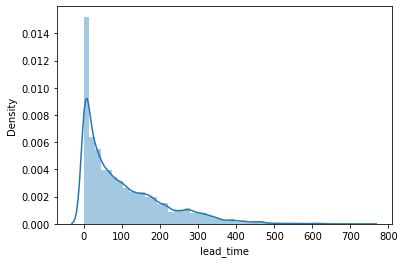

In [109]:
sns.distplot(dataframe['lead_time'])

In [110]:
import numpy as np

# converting to log of the value
def handle_outlier(col):
    dataframe[col]= np.log1p(dataframe[col])
    

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

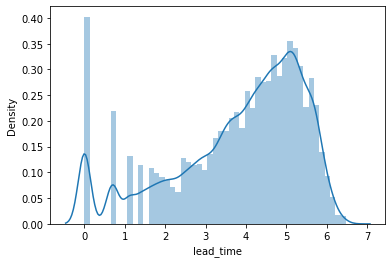

In [111]:
handle_outlier('lead_time')
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

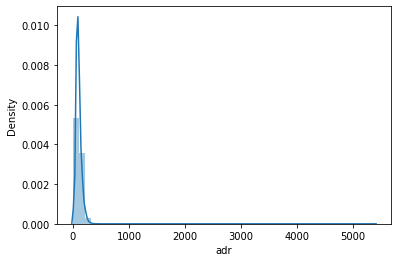

In [112]:
sns.distplot(dataframe['adr'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

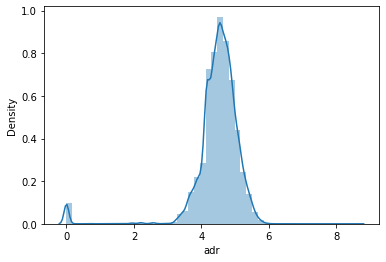

In [113]:
handle_outlier('adr')
sns.distplot(dataframe['adr'].dropna())

In [114]:
# These type of normal distribution is needed for Machine Learning!

In [115]:
dataframe.dropna(inplace=True)

In [116]:
y = dataframe['is_canceled']
x = dataframe.drop('is_canceled', axis=1)
y.value_counts()



0    75165
1    44224
Name: is_canceled, dtype: int64

In [117]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [118]:

feature_selection = SelectFromModel(Lasso(alpha= 0.01, random_state= 0))


In [119]:
feature_selection.fit(x,y)


SelectFromModel(estimator=Lasso(alpha=0.01, random_state=0))

In [120]:
# True are the columns which are selu

selected_cols = x.columns[feature_selection.get_support()]

In [121]:
len(selected_cols)

13

In [122]:
selected_cols

Index(['deposit_type', 'year', 'month', 'day', 'lead_time',
       'arrival_date_week_number', 'previous_cancellations', 'booking_changes',
       'agent', 'company', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

## Logistic Regression

In [123]:
# using linear regression for classification is inaccurate
# linear line gets deviated by outliers
# hence logistic regression is used.
# sum of distances of all data points from plane 
# measured above plane and below plane seperately

# Value of cost function should be Maximum, for best fit

# sigmoid function(1/(1+e^-z)) used in logistic regression converts value obtained by linear regression 
# into number in Range [0,1]


In [124]:
# Cross Validation

# X_train, X_test, Y_test, Y_train = train_test_split(X(cols), Y, random_state= 0, test_size=0.25)
# Test data and train data will be selected randomly
# Accuracy changes as the random selection of train nd test set changes everytime.
# Each run gives a different accuracy of results
# To counteract this Accuracy issue, We have CROSS VALIDATION

# Types in CROSS Validation:
# 1. K-fold
# 2. GridSearch -> it returns best accuracy model by trail and err
# 3. RandomizedSearch -> returns best accuracy by selecting random parameters(faster method)
# 4. Genetic Algo 

# MODEL HYPER-TUNING





## Machine Learning Algo

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=50)

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)







LogisticRegression()

In [134]:
y_pred= logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [135]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

# right bottom and left top are right predictions

array([[13244,  1808],
       [ 4893,  3933]], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7193651059552726

In [129]:
# Cross-validation of the model

# different sets of train data and test data is considered in cross-validation
# cv represents no. of different sets formed.

from sklearn.model_selection import cross_val_score

In [132]:
score = cross_val_score(logreg,x,y,cv=30)
print(score.max())
print(score.mean())

0.8404121638602664
0.686076221772345


## Decision Tree

In [ ]:
# DECISION TREE is extensively used in classification Algo
#Can also be used in regression
# It is a BASE ALGORITHM for other methods like Random Forests etc

# Used wen you split a data based on a Condition
# Decision tree is formed using Entropy or Information Gain.
# Pre Proning and Post proning conditions are used, for Overfitting issue.

# In POST Pruning, useless branches are removed from the decision tree 
# In Pre Pruning, Depth of the tree is controlled before forming Decision Tree

# ENTROPY - Randomness in your data or impurity in data

# Parameter having high information gain wil be used as ROOT Node.

# Different ALGO in Decsion trees:
# 1.ID3-- Categorical attribute
# 2.C4.5(extension of ID3)-- Cont. and Discrete data
# 3.CART -- Classification and regression trees.
# 4.C5.0 -- Better than C4.5
# 6.Decision stump -- single tree/split
# 7.M5 version 

# Advantages:
#1. Can be used in classification and regression
#2. Easy Algo
#3. No need to deal with Outliers
#4. scaling and normalization not req.

# Disadv:
#1. Small change in training data, causes unstability in Tree
#2. prob of overfitting is High
#3. More time to train tree

# Use DT for Regression:
# create ranges 

In [ ]:
# RANDOM FORESTS :=
# Used in both classification and Regression
# Ensemble learning Approach-- it learns from multiple models,
#and it combines all models.
# Rand.Forst is collection of multiple decision trees
# Pattern is recorded from Training Set and used to 
#produce results of testing set.
# Here, node with highest Information Gain is used as Parent Node.


### KNN

#### KNN is Not used for huge data, coz it takes lots of time. Data points are classified based on the Nearest data points. KNN uses Euclidean dist formulae to find nearest points.

#### KNN is used wen we are looking for similar items. It is a Lazy-learner Algo.

#### If the case is Regression, Take mean of nearest data points and In case of Classification, consider Mode.

#### Very esy to impliment, Math is easy

### Nave Bayes

#### It entirely works on basis of Bayes Theorem of Probability. it can be used for categorical, continous and NLP.



## Apply multiple Algorithm on the Data

In [139]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [140]:
models = []
# add tuples in the list
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))


In [141]:
models

[('LogisticRegression', LogisticRegression()),
 ('Naive bayes', GaussianNB()),
 ('RandomForest', RandomForestClassifier()),
 ('KNN', KNeighborsClassifier())]

In [142]:
for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(predictions)
    print('\n')
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    print('\n')
    print(accuracy_score(predictions, y_test))
    print('\n')


LogisticRegression
[1 1 0 ... 0 0 0]


[[15627  5424]
 [ 3179  5618]]


0.7117729831144465


Naive bayes
[1 1 1 ... 1 0 1]


[[ 7920  1149]
 [10886  9893]]


0.596790404717234


RandomForest
[1 1 0 ... 1 0 0]


[[18676  1224]
 [  130  9818]]


0.954636826588046


KNN
[1 0 0 ... 1 1 0]


[[18694  1257]
 [  112  9785]]


0.9541342803537926


